In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IMF_api import IMF_API

In [2]:
IFS_api = IMF_API('IFS')
countries = ['Russian Federation', 'United Kingdom', 'Canada']

In [3]:
for country in countries:
    print(IFS_api.get_country_code(country))

RU
GB
CA


In [4]:
FSI_api = IMF_API('FSI')
search = 'capital risk Domes'
FSI_api.indicator_search(search)

,@value,#text
0,FS_ODX_CET1_FSCET_XDC,"Monetary and Financial Accounts, Financial Sou..."
1,FS_ODX_ARW_FSCET_XDC,"Monetary and Financial Accounts, Financial Sou..."
2,FS_ODX_ARW_FSKRC_XDC,"Monetary and Financial Accounts, Financial Sou..."
3,FS_ODX_ARW_FSKRTC_XDC,"Monetary and Financial Accounts, Financial Sou..."
4,FS_ODX_CT1_FSKRTC_XDC,"Monetary and Financial Accounts, Financial Sou..."
5,FS_ODX_CRT_FSKRC_XDC,"Monetary and Financial Accounts, Financial Sou..."
6,FSNSNO_FSSNO_XDC,"Monetary and Financial Accounts, Financial Sou..."


In [5]:
results = FSI_api.search_data_availability(search, countries, 2000, 2020, 'Q')
results

,FS_ODX_ARW_FSKRTC_XDC,FS_ODX_CT1_FSKRTC_XDC,FS_ODX_CRT_FSKRC_XDC,FS_ODX_ARW_FSKRC_XDC,FSNSNO_FSSNO_XDC,FS_ODX_ARW_FSCET_XDC,FS_ODX_CET1_FSCET_XDC
country,,,,,,,
CA,2005-2020,2005-2020,2005-2020,2005-2020,NaN,NaN,NaN
GB,2005-2020,2005-2020,2005-2020,2005-2020,2005-2020,2014-2020,2014-2020
RU,2008-2020,2008-2020,2008-2020,2008-2020,2008-2020,NaN,NaN


In [6]:
IFS_api = IMF_API('IFS')
search = 'exchange real effective'
IFS_api.indicator_search(search)

,@value,#text
0,EREER_IX,"Exchange Rates, Real Effective Exchange Rate b..."
1,EREER_PC_CP_A_PT,"Exchange Rates, Real Effective Exchange Rate b..."
2,EREER_ULC_IX,"Exchange Rates, Real Effective Exchange Rate b..."


In [7]:
results = IFS_api.search_data_availability(search, countries, 2000, 2020, 'Q')
results

,EREER_IX,EREER_ULC_IX,EREER_PC_CP_A_PT
country,,,
CA,2000-2020,2000-2020,NaN
GB,2000-2020,2000-2020,NaN
RU,2000-2020,NaN,NaN


In [8]:
indicators_FSI = ['FSKRC_PT', 'FSKRTC_PT']
indicators_IFS = ['EREER_IX']

In [9]:
for indicator in indicators_FSI:
    print(FSI_api.get_indicator_name(indicator))

for indicator in indicators_IFS:
    print(IFS_api.get_indicator_name(indicator))

Financial, Financial Soundness Indicators, Core Set, Deposit Takers, Capital Adequacy, Regulatory Capital to Risk-Weighted Assets, Percent
Financial, Financial Soundness Indicators, Core Set, Deposit Takers, Capital Adequacy, Regulatory Tier 1 Capital to Risk-Weighted Assets, Percent
Exchange Rates, Real Effective Exchange Rate based on Consumer Price Index, Index


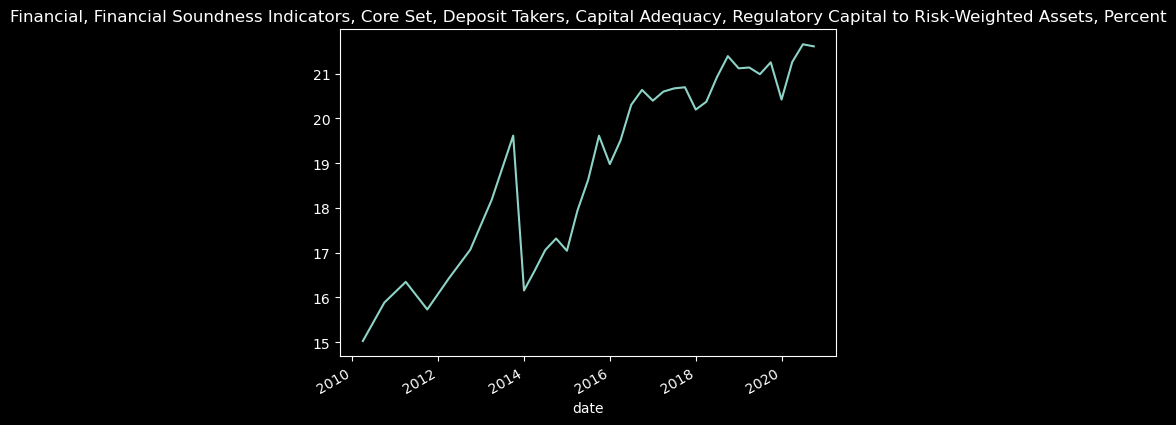

In [22]:
uk_FSKRC_PT = FSI_api.get_series(indicator='FSKRC_PT', country='United Kingdom', startYear=2010, endYear=2020, frequency='Q').reset_index(level=1).iloc[:,1]
uk_FSKRC_PT.plot()
plt.title(uk_FSKRC_PT.name)
plt.show()

In [24]:
IFS_api = IMF_API('IFS')
FSI_api = IMF_API('FSI')

data_IFS = IFS_api.get_series(indicators_IFS, countries, 2010, 2020, 'Q')
data_FSI = FSI_api.get_series(indicators_FSI, countries, 2010, 2020, 'Q')
dataset = pd.merge(data_FSI, data_IFS, how='outer', on=['date', "country"]).sort_index()

In [31]:
dataset.head()

Financial, Financial Soundness Indicators, Core Set, Deposit Takers, Capital Adequacy, Regulatory Tier 1 Capital to Risk-Weighted Assets, Percent  \
date       country                                                                                                                                                      
2010-01-01 CA                                               12.414406                                                                                                   
           GB                                                     NaN                                                                                                   
           RU                                               14.606693                                                                                                   
2010-04-01 CA                                               12.889560                                                                                                   
           GB                                               12.351023                                                                                                   

                    Financial, Financial Soundness Indicators, Core Set, Deposit Takers, Capital Adequacy, Regulatory Capital to Risk-Weighted Assets, Percent  \
date       country                                                                                                                                               
2010-01-01 CA                                               14.816699                                                                                            
           GB                                                     NaN                                                                                            
           RU                                               20.483179                                                                                            
2010-04-01 CA                                               15.429925                                                                                            
           GB                                               15.027093                                                                                            

                    Exchange Rates, Real Effective Exchange Rate based on Consumer Price Index, Index  
date       country                                                                                     
2010-01-01 CA                                               98.770285                                  
           GB                                               99.079550                                  
           RU                                               98.392140                                  
2010-04-01 CA                                              100.948096                                  
           GB                                               98.877582

In [28]:
dataset.to_csv('./data/imf_dataset.csv')